# In previous notebook, we have learned about the basic usage of pandas. In this notebook, we will learn more about pandas.

#### In previous we talk about drop function, but we didn't talk about dropna and fillna function. Let's talk about it now.

dropna function is used to drop rows with missing values. fillna function is used to fill missing values.
Since we don't have any missing values in our data, we will create some missing values and then we will use dropna and fillna function.

In [2]:
import pandas as pd

# Create a DataFrame with NaN values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, None, 30, 22, 28],
    'City': ['New York', '', 'Chicago', None, 'Los Angeles'],
    'Salary': [40000, 50000, None, 35000, None]
}

demo = pd.DataFrame(data)
demo

,Name,Age,City,Salary
0,Alice,25.0,New York,40000.0
1,Bob,NaN,,50000.0
2,Charlie,30.0,Chicago,NaN
3,David,22.0,None,35000.0
4,Eva,28.0,Los Angeles,NaN


In [3]:
demo.info()

## We can see the number of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5 non-null      object 
 1   Age     4 non-null      float64
 2   City    4 non-null      object 
 3   Salary  3 non-null      float64
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [4]:
### dropna() method
demo.dropna() # drop all rows with any NaN values

,Name,Age,City,Salary
0,Alice,25.0,New York,40000.0


In [5]:
### fillna() method
demo.fillna(0) # fill all NaN values with 0

,Name,Age,City,Salary
0,Alice,25.0,New York,40000.0
1,Bob,0.0,,50000.0
2,Charlie,30.0,Chicago,0.0
3,David,22.0,0,35000.0
4,Eva,28.0,Los Angeles,0.0


In [6]:
# fill NaN values with the mean of the column\
demo['Age'].fillna(demo['Age'].mean(), inplace=True)
demo['Salary'].fillna(demo['Salary'].mean(), inplace=True)

# fill string value with "Unknown"
demo['City'].fillna('Unknown', inplace=True)
demo

,Name,Age,City,Salary
0,Alice,25.00,New York,40000.000000
1,Bob,26.25,,50000.000000
2,Charlie,30.00,Chicago,41666.666667
3,David,22.00,Unknown,35000.000000
4,Eva,28.00,Los Angeles,41666.666667


### Here, we can see all the missing values are filled butt in index 1 Bob City is neither filled with Unknown or showing NaN value. Because the city of Bob is using '' instead of NaN. So we have to replace '' with NaN and then we can fill it with Unknown.

In [7]:
# replace empty string with None value
demo['City'].replace('', None, inplace=True)
# convert None string to "Unknown"
demo['City'].fillna('Unknown', inplace=True)

demo

,Name,Age,City,Salary
0,Alice,25.00,New York,40000.000000
1,Bob,26.25,Unknown,50000.000000
2,Charlie,30.00,Chicago,41666.666667
3,David,22.00,Unknown,35000.000000
4,Eva,28.00,Los Angeles,41666.666667


## We will import Section_A data which we created in previous notebook to learn more about pandas.

In [8]:
import pandas as pd
df = pd.read_csv("Section_A.csv")

In [9]:
df.head(10)

,id,Name,Gender,Age,Science,English,History,Maths,Total
0,5,Jocelin,Male,14,43,6,3,21,73
1,9,Corrine,Male,15,39,16,22,49,126
2,13,Merrick,Male,15,65,89,96,34,284
3,16,Gilberta,Male,15,53,30,90,64,237
4,17,Peggy,Male,13,91,45,44,45,225
5,21,Amery,Male,13,76,96,67,17,256
6,25,Jone,Male,14,17,87,16,50,170
7,26,Rae,Female,15,16,59,18,64,157
8,27,Charmine,Female,14,93,93,83,40,309
9,28,Hanan,Male,14,60,36,86,92,274


#### I think age column is not important for us, so we will drop it.

In [10]:
# drop age column
df.drop('Age', axis=1, inplace=True)

### We can make two new dataframe from this data frame. One will have all male and other all female.

In [11]:
# male students
S1_male = df.loc[df.Gender=="Male"]
S1_female = df.loc[df.Gender=='Female']

#### Since we have separate table for male and female , we don't need to keep Gender columns, because it will be same for all rows.

In [12]:
# drop Gender columns for both table
S1_male = S1_male.drop("Gender", axis=1)
S2_female = S1_female.drop("Gender", axis=1)

### We can check which student get highest and lowest marks in total. To find highest marks, we will use "idxmax" function and to find lowest marks, we will use "idxmin" function.

Also need to use loc function to get the full row of that student so we can see all information about that student. Without loc function, we will only get the highest or lowest total marks of that student nothng else.

In [13]:
'''Without loc method we get only highest mark here. we don't get the row. '''

S1_male['Total'].idxmax()

41

In [14]:
'''But if we use loc function and then idxmax() function we get the row.'''
# highest row

highest_male = S1_male.loc[S1_male['Total'].idxmax()]
highest_male

id              121
Name       Patrizia
Science          79
English          88
History          96
Maths            98
Total           361
Name: 41, dtype: object

In [15]:
'''Use idxmin() function to get the lowest row.'''
# lowest row

lowest_male = S1_male.loc[S1_male['Total'].idxmin()]
lowest_male

id               5
Name       Jocelin
Science         43
English          6
History          3
Maths           21
Total           73
Name: 0, dtype: object

### We can also merge these two dataframes to get the full information about the student who got highest and lowest marks.
The method we will use is "concat" function.
There are some other function also to merge the dataframes. We will learn about them later.

In [16]:
'''pd.concat() function is used to merge two columns. axis=1 is used to merge columns. axis=0 is used to merge rows. and also we will use rename() function to rename the columns name. If we don't use rename() function then the columns name will be there index number'''
# merge columns
merged_df = pd.concat([highest_male, lowest_male], axis=1)
merged_df = merged_df.rename(columns={merged_df.columns[0]: 'highest', merged_df.columns[1]: 'lowest'})
merged_df

,highest,lowest
id,121,5
Name,Patrizia,Jocelin
Science,79,43
English,88,6
History,96,3
Maths,98,21
Total,361,73


In [17]:
"""We can also use keys parameter to rename the columns name. keys parameter is used to merge columns with index. Both rename() function and keys parameter are same. It is up to you which one you want to use."""
# merge column with index

merged_df = pd.concat([highest_male, lowest_male], axis=1, keys=['highest_male', 'lowest_male'])

#### Transpose function is used to change the row into column and column into row.

In [18]:
# show highest and lowest marks as rows
merged_df = merged_df.transpose()
merged_df

,id,Name,Science,English,History,Maths,Total
highest_male,121,Patrizia,79,88,96,98,361
lowest_male,5,Jocelin,43,6,3,21,73


### For female students, we will find the highest and lowest marks in each subject. then use concat function to merge them. We will use "axis" parameter to merge them in column wise. and apply "transpose" function to change the row into column and column into row.

In [19]:
# highest lowest mark obtain by female student

highest_female = S1_female.loc[S1_female['Total'].idxmax()]
lowest_female = S1_female.loc[S1_female['Total'].idxmin()]

In [20]:
mergeBy_Concat = pd.concat([highest_female, lowest_female], axis=1, keys= ['Highest_girl', 'Lowest_girl'])
mergeBy_Concat = mergeBy_Concat.transpose()
mergeBy_Concat

,id,Name,Gender,Science,English,History,Maths,Total
Highest_girl,69,Nil,Female,84,97,70,96,347
Lowest_girl,154,Milo,Female,47,16,55,21,139


#### There is another function called join() function. join() function is also used to merge columns. But join() function is used to merge columns with rows. join() function is used to merge columns with index. Both join() function and keys parameter are same.

since the highest_female variable is a series type variable, we can't use join() function on it. So we will convert it into dataframe type variable and then we will use join() function on it.

In [21]:
# merge highest and lowest marks obtained by female students using join() function
merged_female = highest_female.to_frame().join(lowest_female.to_frame(), lsuffix='_highest', rsuffix='_lowest')
merged_female = merged_female.rename(columns={merged_female.columns[0]: 'highest', merged_female.columns[1]: 'lowest'})

In [22]:
merged_female

,highest,lowest
id,69,154
Name,Nil,Milo
Gender,Female,Female
Science,84,47
English,97,16
History,70,55
Maths,96,21
Total,347,139


### Another example of join function. where two dataframes are merged.

In [23]:
# DataFrame 1
demo1 = {
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 28]
}
df1 = pd.DataFrame(demo1)

# DataFrame 2
demo2 = {
    'ID': [3, 4, 2],
    'Occupation': ['Engineer', 'Teacher', 'Doctor']
}
df2 = pd.DataFrame(demo2)

mer_join = df1.join(df2.set_index('ID'), on='ID')
mer_join

,ID,Name,Age,Occupation
0,1,Alice,25,NaN
1,2,Bob,30,Doctor
2,3,Charlie,22,Engineer
3,4,David,28,Teacher


## We can visualize the students data using plot function

'here we demosntrate how to plot a bar chart using plot function and we show how to change the color of the graph and the title of the graph. We also show how to change the size of the graph using the figsize parameter.'

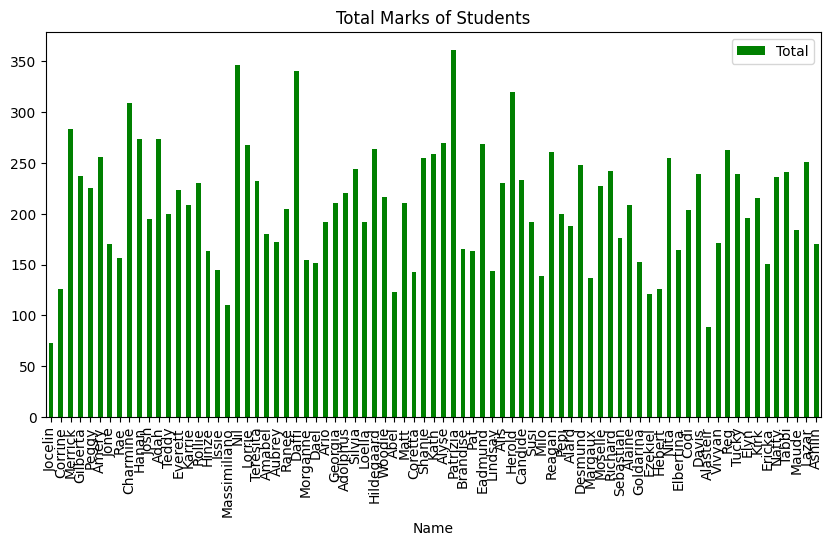

In [26]:
# plot df Maths columns as a bar chart
df.plot(kind='bar', x='Name', y='Total', figsize=(10, 5), title='Total Marks of Students', color='green')

'''here we demosntrate how to plot a bar chart using plot function and we show how to change the color of the graph and the title of the graph. We also show how to change the size of the graph using the figsize parameter.'''

#### Here showing highest and lowest student data as bar chart

<Axes: title={'center': 'Total Marks of Students'}>

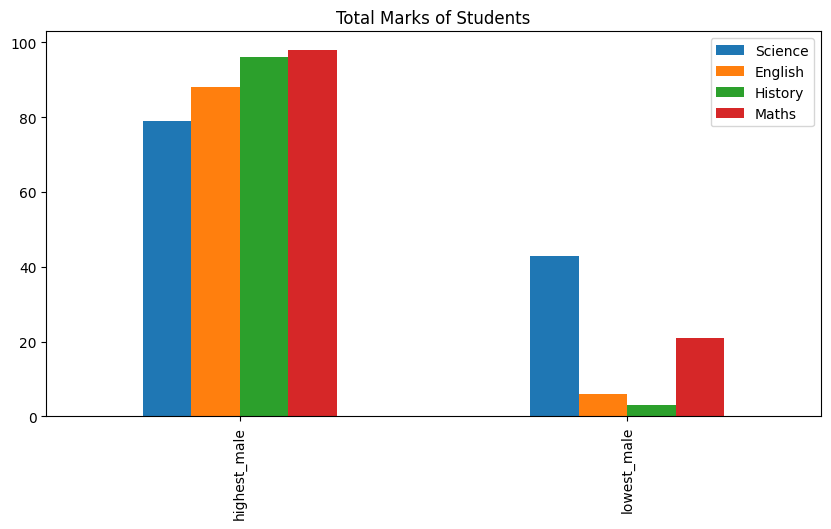

In [25]:
merged_df.plot(kind='bar', y=['Science','English','History','Maths'], figsize=(10, 5), title='Total Marks of Students')